# Atmospheric Temperature Trends 

This notebook computes the vertical profile of atmosphere temperature trends in multiple CMIP6 models

Specifically we want to reproduce the figure 2 of Mitchell et al. 2013

In [1]:
import pandas as pd
import intake
import xarray as xr
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [10]:
def _compute_slope(y):
    """
    Private function to compute slopes at each grid cell using
    polyfit. 
    """
    x = np.arange(len(y))
    return np.polyfit(x, y, 1)[0] # return only the slope

def compute_slope(da):
    """
    Computes linear slope (m) at each grid cell.
    
    Args:
      da: xarray DataArray to compute slopes for
      
    Returns:
      xarray DataArray with slopes computed at each grid cell.
    """
    # apply_ufunc can apply a raw numpy function to a grid.
    # 
    # vectorize is only needed for functions that aren't already
    # vectorized. You don't need it for polyfit in theory, but it's
    # good to use when using things like np.cov.
    #
    # dask='parallelized' parallelizes this across dask chunks. It requires
    # an output_dtypes of the numpy array datatype coming out.
    #
    # input_core_dims should pass the dimension that is being *reduced* by this operation,
    # if one is being reduced.
    slopes = xr.apply_ufunc(_compute_slope,
                            da,
                            vectorize=True,
                            dask='parallelized', 
                            input_core_dims=[['years']],
                            output_dtypes=[float],
                            )
    return slopes

# Vertical profile of temperature trend using multi-model ensemble

In [2]:
cat_df = pd.read_csv('https://storage.googleapis.com/pangeo-cmip6/pangeo-cmip6-zarr-consolidated-stores.csv')
cat_df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,prsn,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN


In [30]:
# load ta data using intake
# open ESMCol catalog
cat_url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
# search and display data
cat = col.search(experiment_id=['historical'], table_id='Amon', variable_id='ta',member_id='r1i1p1f1')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
157,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN
288,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/BCC/BCC-CSM2-MR/historical/r1i...,NaN
551,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/BCC/BCC-ESM1/historical/r1i1p1...,NaN
826,CMIP,CAMS,CAMS-CSM1-0,historical,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CAMS/CAMS-CSM1-0/historical/r1...,NaN
2445,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r1i1p...,NaN
5744,CMIP,E3SM-Project,E3SM-1-0,historical,r1i1p1f1,Amon,ta,gr,gs://cmip6/CMIP/E3SM-Project/E3SM-1-0/historic...,NaN
5999,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,ta,gr,gs://cmip6/CMIP/EC-Earth-Consortium/EC-Earth3-...,NaN
7339,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Amon,ta,gr,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN
9575,CMIP,MIROC,MIROC6,historical,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/MIROC/MIROC6/historical/r1i1p1...,NaN
11167,CMIP,MRI,MRI-ESM2-0,historical,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/MRI/MRI-ESM2-0/historical/r1i1...,NaN


In [4]:
len(cat.df)

20

In [31]:
# load the model
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True})
model_list = list(dset_dict.keys())

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 20 group(s)


## Computing the slope

In [17]:
years = range(1979, 2009)
tatrend_list = []
for mod in model_list:
    print(mod)
    ds = dset_dict[mod]
    ta_list = []
    for i, year in enumerate(years):
        ta = ds.ta.sel(time=str(year)).mean(dim='time')
        ta_list.append(ta.squeeze())
    ta_all = xr.concat(ta_list,dim=pd.Index(years, name='years'))
    if mod=='CMIP.UA.MCM-UA-1-0.historical.Amon.gn':
        ta_zm = ta_all.mean(dim='longitude')
        ta_sm = ta_zm.sel(latitude = slice(-20,20)).mean(dim='latitude')
    else:
        ta_zm = ta_all.mean(dim='lon')
        ta_sm = ta_zm.sel(lat = slice(-20,20)).mean(dim='lat')
    taano_sm = ta_sm-ta_sm.mean(dim='years')
    taano_sm = taano_sm.chunk({'years': -1})
    taano_trend = compute_slope(taano_sm)
    tatrend_list.append(taano_trend.sel(plev=slice(10e4,1.5e4))*10)
tatrend = xr.concat(tatrend_list, dim=pd.Index(model_list, name='models'))

CMIP.AWI.AWI-CM-1-1-MR.historical.Amon.gn
CMIP.BCC.BCC-CSM2-MR.historical.Amon.gn
CMIP.BCC.BCC-ESM1.historical.Amon.gn
CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn
CMIP.CCCma.CanESM5.historical.Amon.gn
CMIP.E3SM-Project.E3SM-1-0.historical.Amon.gr
CMIP.EC-Earth-Consortium.EC-Earth3-Veg.historical.Amon.gr
CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr
CMIP.MIROC.MIROC6.historical.Amon.gn
CMIP.MRI.MRI-ESM2-0.historical.Amon.gn
CMIP.NASA-GISS.GISS-E2-1-G.historical.Amon.gn
CMIP.NASA-GISS.GISS-E2-1-G-CC.historical.Amon.gn
CMIP.NASA-GISS.GISS-E2-1-H.historical.Amon.gn
CMIP.NCAR.CESM2.historical.Amon.gn
CMIP.NCAR.CESM2-WACCM.historical.Amon.gn
CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1
CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1
CMIP.NUIST.NESM3.historical.Amon.gn
CMIP.SNU.SAM0-UNICON.historical.Amon.gn
CMIP.UA.MCM-UA-1-0.historical.Amon.gn


In [23]:
# save the trend
f_o = 'lineartrend_t_troposphere_{:}CMIP6models.nc'.format(len(cat.df))
tatrend.to_netcdf(f_o, 'w')

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.

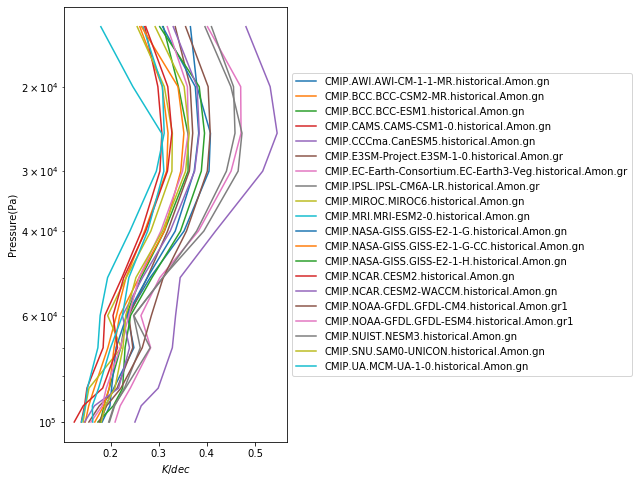

In [32]:
# plot trend
fig=plt.figure(figsize=(5,8))
for j, mod in enumerate(model_list):
    plt.plot(tatrend.sel(models=mod), tatrend.plev, label=mod)
    plt.xlabel('$K/dec$')
    plt.ylabel('Pressure(Pa)')
plt.yscale('log')
ax = plt.gca()
ax.invert_yaxis()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('lineartrend_t_troposphere_{:}CMIP6models.pdf'.format(len(cat.df)),dpi=300)

# vertical profile of temperture trend with large ensemble of CanESM5

In [9]:
# load member_id we need
# open ESMCol catalog
cat_url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
# search and display data
cat = col.search(experiment_id=['historical'], table_id='Amon', variable_id='ta',source_id='CanESM5')
member_id = cat.df.member_id
memberid_sublist = set(list(filter(lambda x: 'p1f1' in x, member_id)))
memberid_sublist

{'r10i1p1f1',
 'r11i1p1f1',
 'r12i1p1f1',
 'r13i1p1f1',
 'r14i1p1f1',
 'r15i1p1f1',
 'r16i1p1f1',
 'r17i1p1f1',
 'r18i1p1f1',
 'r19i1p1f1',
 'r1i1p1f1',
 'r20i1p1f1',
 'r21i1p1f1',
 'r22i1p1f1',
 'r23i1p1f1',
 'r24i1p1f1',
 'r25i1p1f1',
 'r2i1p1f1',
 'r3i1p1f1',
 'r4i1p1f1',
 'r5i1p1f1',
 'r6i1p1f1',
 'r7i1p1f1',
 'r8i1p1f1',
 'r9i1p1f1'}

In [32]:
# load ta data using intake
# open ESMCol catalog
cat_url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
# search and display data
cat = col.search(experiment_id=['historical'], table_id='Amon', variable_id='ta',
                 source_id='CanESM5', member_id=list(memberid_sublist))
nm = len(cat.df)
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1408,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1578,CMIP,CCCma,CanESM5,historical,r11i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r11i1...,NaN
1674,CMIP,CCCma,CanESM5,historical,r12i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r12i1...,NaN
1770,CMIP,CCCma,CanESM5,historical,r13i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r13i1...,NaN
1867,CMIP,CCCma,CanESM5,historical,r14i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r14i1...,NaN
1963,CMIP,CCCma,CanESM5,historical,r15i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r15i1...,NaN
2059,CMIP,CCCma,CanESM5,historical,r16i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r16i1...,NaN
2155,CMIP,CCCma,CanESM5,historical,r17i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r17i1...,NaN
2252,CMIP,CCCma,CanESM5,historical,r18i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r18i1...,NaN
2349,CMIP,CCCma,CanESM5,historical,r19i1p1f1,Amon,ta,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r19i1...,NaN


In [39]:
# load the model
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True})
model_list = list(dset_dict.keys())

In [49]:
years = range(1979, 2009)
tatrend_list = []
ds = dset_dict[model_list[0]]
ta_list=[]
for i, year in enumerate(years):
    ta = ds.ta.sel(time=str(year)).mean(dim='time')
    ta_list.append(ta.squeeze())
ta_all = xr.concat(ta_list,dim=pd.Index(years, name='years'))
ta_zm = ta_all.mean(dim='lon')
ta_sm = ta_zm.sel(lat = slice(-20,20)).mean(dim='lat')
taano_sm = ta_sm-ta_sm.mean(dim='years')
taano_sm = taano_sm.chunk({'years': -1})
taano_trend = compute_slope(taano_sm)
tatp_trend = taano_trend.sel(plev=slice(10e4,1.5e4))*10


In [52]:
# save the trend
f_o = 'lineartrend_t_troposphere_{:}CanESM5runs.nc'.format(len(cat.df))
tatp_trend.to_netcdf(f_o, 'w')

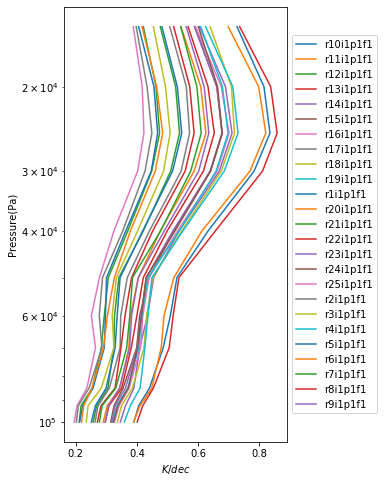

In [51]:
# plot trend
fig=plt.figure(figsize=(5,8))
for j, member in enumerate(tatp_trend.member_id.values):
    plt.plot(tatp_trend.sel(member_id=member), tatp_trend.plev, label=member)
    plt.xlabel('$K/dec$')
    plt.ylabel('Pressure(Pa)')
plt.yscale('log')
ax = plt.gca()
ax.invert_yaxis()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('lineartrend_t_troposphere_{:}CanESM5runs.pdf'.format(len(cat.df)),dpi=300)

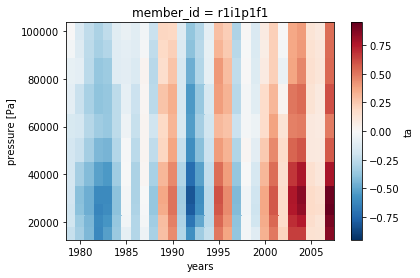

In [82]:
taano_sm.sel(plev=slice(10e4,1.5e4)).T.plot()
ax=plt.gca()
